# 필요한 font와 library import

In [1]:
# font

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [16]:
# necessary library import

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 준비

In [55]:
data = pd.read_csv('/content/drive/MyDrive/toyproject/use_this_final.csv', encoding='cp949')
data

,Unnamed: 0,신고일,구정보,주소,유형,조치일,횟수,위도,경도,가장 가까운 지하철역명,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장명,가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,상권_코드_명,행정동_코드_명,행정동,인구수
0,0,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15,47,37.495576,126.919579,보라매,502.960023,보라매공원,138.031584,10213597.0,신길6동주민센터,신길6동,신대방2동,8426.0
1,1,2021-07-15,영등포구,서울특별시 영등포구 신길동 4209,횡단보도,2021-07-15,14,37.505560,126.912780,신풍,656.772382,신길중앙새마을금고신길4동지점,17.951137,7297403.0,신길새마을금고신길4동지점,신길4동,신길6동,6501.0
2,2,2021-07-15,영등포구,서울특별시 영등포구 신길동 4934-12,횡단보도,2021-07-15,27,37.505560,126.912780,신풍,656.772382,신길중앙새마을금고신길4동지점,17.951137,7297403.0,신길새마을금고신길4동지점,신길4동,신길4동,3785.0
3,3,2021-07-15,마포구,서울특별시 마포구 연남동 260-65,보도와 차도가 구분된 도로의 차도,2021-07-15,15,37.562660,126.922611,홍대입구,653.589553,코오롱아파트104동앞,69.237335,16035818.0,연트럴파크(연남동주민센터),연남동,연남동,6791.0
4,4,2021-07-15,동작구,서울특별시 동작구 사당동 1112,진출입로,2021-07-15,31,37.485696,126.972352,남성,132.847132,대림현대아파트,52.509713,25331714.0,남성역 1번,사당4동,사당1동,10597.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44073,44073,2023-08-31,용산구,서울특별시 용산구 청파동2가 1-169,차도,2023-08-31,29,37.546550,126.966750,숙대입구(갈월),464.371931,숙명여대도서관앞,191.880515,16678016.0,숙대입구,청파동,청파동,8525.0
44074,44074,2023-08-31,용산구,서울특별시 용산구 이촌동 171-1,차도,2023-08-31,110,37.520860,126.966120,이촌(국립중앙박물관),679.642784,이촌동두산위브트레지움,71.360927,4909144.0,한강미주맨션아파트,이촌1동,이촌2동,2381.0
44075,44075,2023-08-31,용산구,서울특별시 용산구 한남동 685-22,차도,2023-08-31,40,37.538220,127.007400,한강진,530.297426,순천향대학병원,246.482542,2047191.0,한남초등학교,한남동,한남동,6591.0
44076,44076,2023-08-31,동작구,서울특별시 동작구 사당동 708-1052,차도,2023-08-31,12,37.485696,126.972352,남성,132.847132,대림현대아파트,52.509713,25331714.0,남성역 1번,사당4동,사당2동,8917.0


In [5]:
print(data.columns)

Index(['Unnamed: 0', '신고일', '구정보', '주소', '유형', '조치일', '횟수', '위도', '경도',
       '가장 가까운 지하철역명', '가장 가까운 지하철역과의 거리(m)', '가장 가까운 버스정거장명',
       '가장 가까운 버스정거장과의 거리(m)', '연간_유동인구_수', '상권_코드_명', '행정동_코드_명', '행정동',
       '인구수'],
      dtype='object')


In [6]:
for i in data:
  print(i, " ", data[i].dtype)

Unnamed: 0   int64
신고일   object
구정보   object
주소   object
유형   object
조치일   object
횟수   int64
위도   float64
경도   float64
가장 가까운 지하철역명   object
가장 가까운 지하철역과의 거리(m)   float64
가장 가까운 버스정거장명   object
가장 가까운 버스정거장과의 거리(m)   float64
연간_유동인구_수   float64
상권_코드_명   object
행정동_코드_명   object
행정동   object
인구수   float64


In [7]:
# object to numeric (Label Encoding)

from sklearn.preprocessing import LabelEncoder

# Label Encoding을 수행할 열 선택
categorical_columns = ['구정보','주소','유형','가장 가까운 지하철역명', '가장 가까운 버스정거장명', '상권_코드_명', '행정동_코드_명', '행정동']

# Label Encoder 생성 및 적용
encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

In [8]:
# 필요한 열만 선택합니다. => 범주형 데이터 제외, 오로지 수치형만
X = data[['횟수','가장 가까운 지하철역과의 거리(m)', '가장 가까운 버스정거장과의 거리(m)', '연간_유동인구_수', '인구수']]

# data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = ['횟수','가장 가까운 지하철역과의 거리(m)', '가장 가까운 버스정거장과의 거리(m)', '연간_유동인구_수', '인구수']
X_scaled_df

,횟수,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,인구수
0,-0.297883,0.159488,0.139692,-0.556461,-0.217274
1,-0.531866,0.756199,-1.794024,-0.922667,-0.675021
2,-0.439691,0.756199,-1.794024,-0.922667,-1.320861
3,-0.524775,0.743851,-0.968137,0.174674,-0.606062
4,-0.411329,-1.276356,-1.237510,1.342022,0.298969
...,...,...,...,...,...
44073,-0.425510,0.009786,1.006848,0.255320,-0.193733
44074,0.148810,0.844924,-0.933939,-1.222576,-1.654719
44075,-0.347516,0.265542,1.886132,-1.581971,-0.653620
44076,-0.546046,-1.276356,-1.237510,1.342022,-0.100519


# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


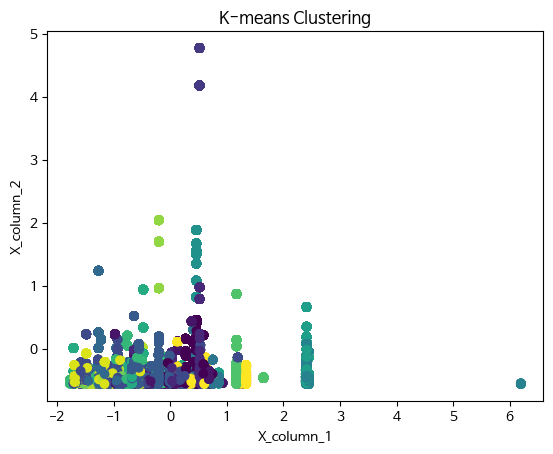

In [53]:
# K-means and PCA

'''
# 주성분 분석을 수행합니다.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
'''

# K-means
kmeans = KMeans(n_clusters = 19)  # 클러스터의 개수는 원하는대로 조절 가능합니다.
kmeans.fit(X_scaled)

# result
X_scaled_df['cluster'] = kmeans.labels_

'''
# 클러스터별 중심점을 출력합니다.
centroids = pca.inverse_transform(kmeans.cluster_centers_)
print("Cluster centroids:")
print(centroids)

# 클러스터링 결과를 시각화합니다.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.title('K-means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
'''

'''
# 클러스터별 중심점을 출력합니다.
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centroids:")
print(centroids)
'''

# 클러스터링 결과 시각화
plt.scatter(X_scaled_df['연간_유동인구_수'], X_scaled_df['횟수'], c=X_scaled_df['cluster'], cmap='viridis')
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.title('K-means Clustering')
plt.xlabel('X_column_1')
plt.ylabel('X_column_2')
plt.show()

In [ ]:
X_scaled_df

# 군집 시각화

In [ ]:
# 2차원 시각화 출력
for i in X:
  for j in X:
    plt.scatter(X_scaled_df[i], X_scaled_df[j], c=X_scaled_df['cluster'], cmap='viridis')
  # plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
    plt.title('K-means Clustering')
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

In [ ]:
#3차원 시각화 출력

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = X_scaled_df

centers = kmeans.cluster_centers_

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.cluster
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
# ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
ax.view_init(20, 80)
ax.set_zlabel("안녕")
plt.show()

In [ ]:
#3차원 시각화 출력2

X = X_scaled_df

centers = kmeans.cluster_centers_

for i in range(5):
    for k in range(5):
        for j in range(5):
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(  X.iloc[:,i]
                    , X.iloc[:,j]
                    , X.iloc[:,k]
                    , c = X.cluster
                    , s = 10
                    , cmap = "rainbow"
                    , alpha = 1
                    )
            ax.view_init(20, 80)
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.show()


# centroid scatterplot
# ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')

In [14]:
X

,횟수,가장 가까운 지하철역과의 거리(m),가장 가까운 버스정거장과의 거리(m),연간_유동인구_수,인구수,cluster
0,-0.297883,0.159488,0.139692,-0.556461,-0.217274,3
1,-0.531866,0.756199,-1.794024,-0.922667,-0.675021,3
2,-0.439691,0.756199,-1.794024,-0.922667,-1.320861,3
3,-0.524775,0.743851,-0.968137,0.174674,-0.606062,3
4,-0.411329,-1.276356,-1.237510,1.342022,0.298969,0
...,...,...,...,...,...,...
44073,-0.425510,0.009786,1.006848,0.255320,-0.193733,1
44074,0.148810,0.844924,-0.933939,-1.222576,-1.654719,3
44075,-0.347516,0.265542,1.886132,-1.581971,-0.653620,1
44076,-0.546046,-1.276356,-1.237510,1.342022,-0.100519,0


# search appropriate K

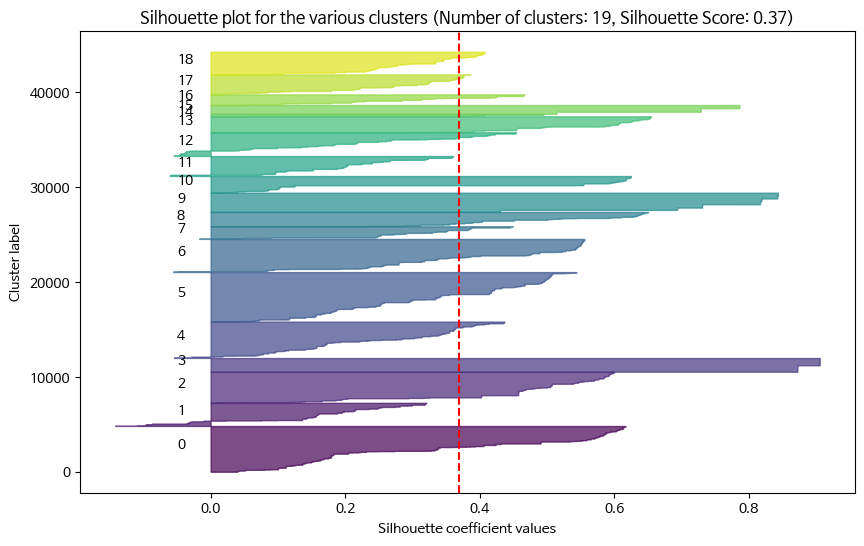

In [54]:
# 실루엣스코어 시각화

cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# 클러스터의 개수
n_clusters = 19

plt.figure(figsize=(10, 6))

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.title(f"Silhouette plot for the various clusters (Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f})")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

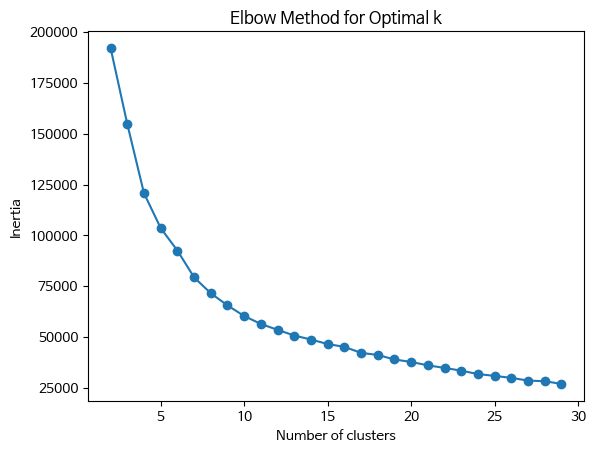

In [19]:
# 엘보우 메소드 시각화

# 클러스터의 개수 범위 설정
k_range = range(2, 30)
# 각 클러스터 수에 대한 inertia(클러스터 내 제곱 거리의 합) 값을 저장할 리스트
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled_df)
    inertia_values.append(kmeans.inertia_)

# 엘보우 메소드를 시각화하여 최적의 k 값을 결정합니다.
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()